## Primer: zimske olimpijske igre, Soči 2014

Na primeru podatkov o olimpijskih igrah bomo preizkusili nekatere pogoste načine grafičnega prikaza podatkov.

## Example: Winter Olympics, Sochi 2014

On the case of information about the Olympic Games, we will try some common ways to graphically display data.

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('../PR.mplstyle')

In [2]:
import pandas as pd
data = pd.read_table('../data/athletes.tab', skiprows=[1])

### Prikaz točk v prostoru

Poglejmo, ali sta višina in teža športnikov povezani. Za vsakega športnika narišimo točko v prostoru dveh spremelnjivk - razsevni diagram (ang. *scatter plot*).

### Display points in space

Let's see if the height and weight of athletes are linked. For each athlete we draw a point in the space of two variables - a Scatter plot.

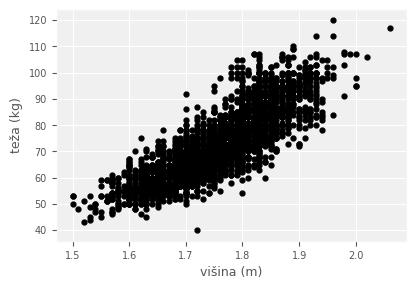

In [11]:
plt.figure()
x = data['height']
y = data['weight']
plt.plot(x, y, "k.")
plt.xlabel('višina (m)')
plt.ylabel('teža (kg)');

##### Vprašanje 2-3-1

Videti je, da sta spremenljivki povezani. Ali sta višina in teža res povezani? Odgovor na to vprašanje lahko dobimo z merami korelacije. S pomočjo slednjih izmerimo, ali sta dve naključni spremenljivki povezani.

<a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient">Pearsonova korelacija</a> med spremenljivkama $X$ in $Y$ je definirana z naslednjim izrazom:

$$\rho = \frac{(x - \bar{x})(y - \bar{y})}{\sigma_x \sigma_y}$$

kjer sta $x$ in $y$ vektorja vzorcev naključnih spremenljivk $X$ in $Y$, $\bar{x}$ in $\bar{y}$ povprečni vrednosti, $\sigma_x$, $\sigma_y$ standardna odklona. Mera $\rho$ zavzame vrednosti v intervalu [-1, 1], kjer vrednost -1 pomeni, da med spremenljivki velja negativna korelacija - sta obratno sorazmerni, vrednost 1 pa da sta premo sorazmerni. Vrednost 0 nakazuje, da sta spremenljivki neodvisni.

##### Question 2-3-1

It looks like the variables are linked. Are height and weight really connected? The answer to this question can be obtained with correlation measures. Using the latter, we measure whether two random variables are connected.

<a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient">Pearson's correlation</a> between the variables $X$ and $Y$ is defined with the following expression:

$$\rho = \frac{(x - \bar{x})(y - \bar{y})}{\sigma_x \sigma_y}$$

where $x$ and $y$ are vector of samples of random variables $X$ and $Y$, $\bar{x}$ and $\bar{y}$ are mean values, $\sigma_x$, $\sigma_y$ standard deviation. The $\rho$ measure takes the values ​​in the interval [-1, 1], where the -1 value means that the variables are negatively correlated - they are inversely proportional, and the value 1 is proportional. The value 0 indicates that the variables are independent.

In [12]:
# implementiraj funkcijo, ki vrne Pearsonovo mero korelacije za vektorja x, y
def pearson(x, y):
    pass

In [13]:
# preveri ali sta višina in teža povezani
pearson(x, y)

[Odgovor](202-3.ipynb#Odgovor-2-3-1)

[Answer](202-3.ipynb#Answer-2-3-1)

### Prikaz porazdelitev

Negotovost pri opazovanju naključne spremenljivke predstavimo s funkcijo porazdelitve. Pogost način, kako dobimo oceno za porazdelitev iz podatkov je uporaba histograma - preštejemo, koliko primerov spada v interval vrednosti spremenljivke. Poglejmo primer za telesno težo.

### Display distributions

We present uncertainty in the observation of a random variable with the distribution function. The common way in which we obtain an estimate for the distribution of data is the use of a histogram - counting how many cases fall into the interval of the value of the variable. Let's look at an example of body weight.

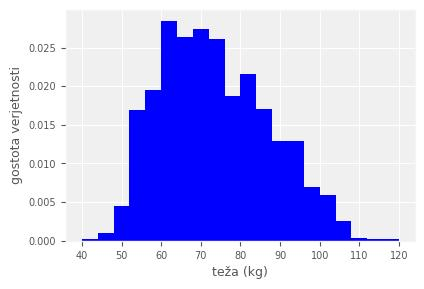

In [14]:
# porazdelitev tež
weights = data['weight']

plt.figure()
plt.hist(weights, density=True, bins=20, color='blue')
plt.xlabel('teža (kg)')
plt.ylabel('gostota verjetnosti');

##### Vprašanje 2-3-2

Ali so porazdelitev teže med posameznimi športi razlikuje? Kaj pa višine? Izberi športnike nekaterih športov in med njimi primerjaj porazdelitve.

##### Question 2-3-2

Is the weight distribution different for different sports? What about the heights? Choose athletes of some sports and compare distributions between them.

In [15]:
# Primerjaj športe po porazdelitvi tež
# Primerjaj športe po porazdelitvi višin

[Odgovor](202-2.ipynb#Odgovor-2-2-4)

[Answer](202-2.ipynb#Answer-2-2-4)

### Nagrade za dosego najvišjih mest

Še en način prikaza porazdelitev je tortni diagram. Prikažimo, kakšen kos pogače prinese vsaka od medalj (zlato \$25.000, srebro \$15.000, bron \$10.000).

### Prizes for reaching the highest places

Another way of displaying distributions is a pie chart. Show what piece of cake each of the medals (gold \$25,000, silver \$15,000 bronze \$10,000) brings .

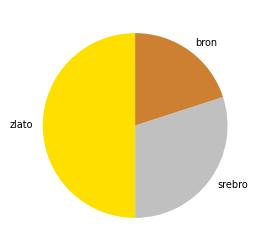

In [16]:
# prikaži primer slike in reprodukcija ; št medalj glede na državo
# Nariši tortni diagram za vsako državo posebej

# Denarni sklad; $25,000 za zlato, $15,000 za srebrno, $10,000 za bronasto medaljo 
total      = 25 + 15 + 10
gold_ratio = 25 / total
silv_ratio = 15 / total
bron_ratio = 10 / total

# barve medalj
gold_color = '#FFDF00'
silv_color = '#C0C0C0'
bron_color = '#CD7F32'

plt.figure(figsize=(3, 3))
plt.pie((gold_ratio, silv_ratio, bron_ratio),
        labels=('zlato', 'srebro', 'bron', ), 
        colors=(gold_color, silv_color, bron_color, ), 
        startangle=90);

Lažje berljiv stolpični diagram:

An easier to read bar diagram:

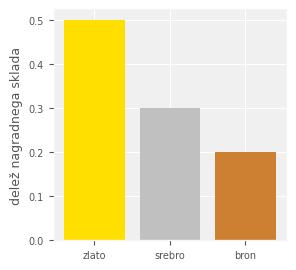

In [17]:
# lažje berljivi stolpični diagram
plt.figure(figsize=(3, 3))
plt.bar(range(3), height=(gold_ratio, silv_ratio, bron_ratio), 
        tick_label=('zlato', 'srebro', 'bron'), 
        color=(gold_color, silv_color, bron_color))
plt.ylabel('delež nagradnega sklada');

### Spol udeležencev

Prikažimo še bolj informativno porazdelitev, ki pokaže število moških in ženskih udeležencev iger za posamezno državo. Najprej izračunamo porazdelitev.

### Gender of participants

We show an even more informative distribution that shows the number of men and women participating in games for each country. First, calculate the distribution.

In [18]:
countries = pd.unique(data['country'])
gender_by_country = dict()

for country in countries:
    # Filter by countries
    data_subset = data.loc[data['country'] == country]

    # Filter males
    data_subset_male = data_subset.loc[data['gender'] == 'Male']
    # Filter females
    data_subset_female = data_subset.loc[data['gender'] == 'Female']

    # Store gender counts
    gender_by_country[country] = {
        'Male': len(data_subset_male),
        'Female': len(data_subset_female),
    }

Nato narišemo sliko z uporabo funkcijo `bar`:

Then draw a picture using the `bar` function:

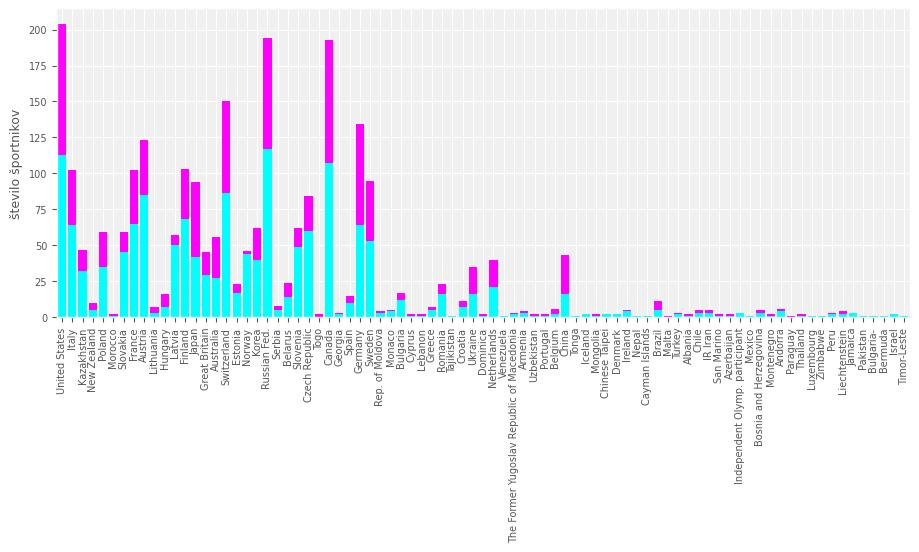

In [19]:
m = [gender_by_country[country]['Male'] for country in countries]
f = [gender_by_country[country]['Female'] for country in countries]
x = range(len(countries))

plt.figure(figsize=(11, 4))
plt.bar(x, m, color='cyan', align='center')
plt.bar(x, f, bottom=m, color='magenta', align='center')
plt.xlim(-0.5, len(countries)-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel('število športnikov');

##### Vprašanje 2-3-3

Grafu dodaj legendo.

##### Question 2-3-3

Add a legend to the graph.

[Odgovor](202-3.ipynb#Odgovor-2-3-3)

[Answer](202-3.ipynb#Answer-2-3-3)

##### Vprašanje 2-3-4

Zgornji graf uredi tako, da bodo države urejene po številu udeležencev in dodaj legendo.

##### Question 2-3-4

Edit the above graph so that the sport is arranged by the number of participants and add the legend.

[Odgovor](202-3.ipynb#Odgovor-2-3-4)

[Answer](202-3.ipynb#Answer-2-3-4)

### Najuspešnejše države

##### Vprašanje 2-3-5

Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev posameznih medalj po državah. Namig: najprej predpripravi podatke, nato pa nariši diagram. Zgleduj se po prejšnih primerih.

### The most successful countries

##### Question 2-3-5

Draw a picture, similar to the one below. The diagram shows the distribution of individual medals by country. Tip: Prepare the data first, then draw a diagram. Take a look at previous examples.

![](slike/odgovori/2-2-7.png)

In [20]:
# izračunaj distribucijo medalj

In [21]:
# izriši distribucijo

[Odgovor](202-3.ipynb#Odgovor-2-3-5)

[Answer](202-3.ipynb#Answer-2-3-5)

### Sestavljene vizualizacije

### Composite visualizations

Namen dobre vizualizacije je prava mera podatkov na danem prostoru. Ta naj ne bo prevelika, vseeno pa želimo čimbolje izkoristiti prostor. Oglejmo si primer risanja <b>porazdelitev podatkov o višini in teži glede na posamezno športno panogo</b>.  

The purpose of a good visualization is the correct amount of data in a given space. This should not be too big, but we want to make the most of the space. Let's look at the example of drawing <b>distribution of data about height and weight by sport category</b>.

In [22]:
# priprava podatkov
# teža in višina glede na sport; sport se nahaja v 8 stolpcu
sports = pd.unique(data['sport'])
weights_by_sport = dict()
heights_by_sport = dict()
ages_by_sport = dict()

for sport in sports:
    data_subset = data.loc[data['sport'] == sport]
    
    w = data_subset.loc[:,'weight'].values
    h = data_subset.loc[:,'height'].values
    a = data_subset.loc[:,'age'].values
    
    weights_by_sport[sport] = w
    heights_by_sport[sport] = h
    ages_by_sport[sport]    = a

##### Vprašanje 2-3-6

Nariši sliko, podobno spodnji. Diagram prikazuje porazdelitev višine po športih. Za vsakega igralca narišimo točko, kjer bo velikost točke premo sorazmerna s težo športnika. Osi x in y bomo izkoristili tako, da na osi x narišemo višino, na osi y pa bo posamezna športna panoga.

##### Question 2-3-6

Draw a picture, similar to the one below. The diagram shows the height distribution by sports. For each player, we draw a point where the point size is proportional to the weight of the athlete. Axes x and y will be used to draw the height on the x-axis, and the y-axis will be an individual sporting industry.

In [23]:
# napiši kodo za izris slike

[Odgovor](202-3.ipynb#Odgovor-2-3-6)

[Aswer](202-3.ipynb#Answer-2-3-6)

##### Vprašanje 2-3-7

Uredi zgornji graf tako, da bodo športi urejeni po povprečni višini. Poizkusi tudi spreminjati količine na posameznih oseh (x, y, velikost pike).

##### Question 2-3-7

Edit the graph above so that the sports are arranged by the average height. Try also to change the quantities on the individual axes (x, y, the size of the dots).

[Odgovor](202-3.ipynb#Odgovor-2-3-7)

[Answer](202-3.ipynb#Answer-2-3-7)